In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


# Prepare the dataset
df = pd.read_csv('/content/human_annotations_same - human_annotations_same.csv')

shuffle(df, n_samples=2, random_state=0)

# Split your dataset into training and testing sets
X = df['text']
y = df['human_label1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8075780089153046


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/human_annotations_same - human_annotations_same.csv')
X = df['text']
y = df['human_label1']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
svm = SVC()

scores = cross_val_score(svm, X, y, cv=10)



In [3]:
 print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.79 accuracy with a standard deviation of 0.04


In [ ]:

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   9.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   9.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=   9.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=   9.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.715 total time=   9.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=  10.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.614 total time=   9.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.611 total time=   9.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.611 total time=   9.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=  10.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   9.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# # best parameter after tuning
# print(grid.best_params_)

# # how the model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       850
           1       0.75      0.72      0.73       496

    accuracy                           0.81      1346
   macro avg       0.79      0.79      0.79      1346
weighted avg       0.81      0.81      0.81      1346



In [ ]:
confusion_matrix(y_test, y_pred)

array([[730, 120],
       [139, 357]])

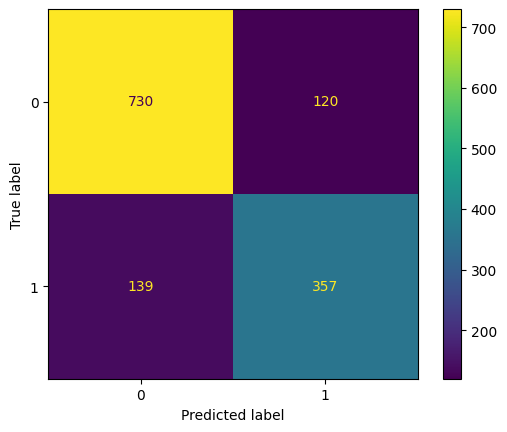

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
